In [1]:
import matplotlib.pyplot as plt
import pickle
import os

In [10]:
beta0_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.99, 2., 5., 10.]
beta1_list = [0.1, 1.,2. ,5., 10., 20., 40.]
T = 1.0
atol = 0.001
rtol = 0.01
nsamp = 500
method = 'dopri5'
cache_dir = '/work/zw122/tree_condsamp/LACE/tree-toy/cache/'

In [11]:
# import os
# [f for f in os.listdir(cache_dir) if 'dopri5_T_1.0_temp_gs.pkl' in f]
# # files = list.files(cache_dir, pattern = 'dopri5_T_1000.0_temp_gs.pkl', full.names )

In [12]:
# for beta0 in beta0_list:
#     for beta1 in beta1_list:
#         for T in [1.]:
#             path = f'{cache_dir}ode_gaussian_nsamp_{nsamp}_beta_0_{beta0}_beta_1_{beta1}_rtol_{rtol}_atol_{atol}_{method}_T_{T}_temp_gs.pkl'
#             if not os.path.exists(path):
#                 path = f'{cache_dir}ode_gaussian_nsamp_{nsamp}_beta_0_{beta0}_beta_1_{int(beta1)}_rtol_{rtol}_atol_{atol}_{method}_T_{T}_temp_gs.pkl'
#             try:
#                 with open(path, 'rb') as f:
#                     data = pickle.load(f)
#                     f.close()
#                 # plt.figure(figsize = (15,5))
#                 # plt.subplot(1,3,1)
#                 plt.scatter(data[:nsamp,0],data[:nsamp,1], label = 1, alpha = 0.5)
#                 plt.scatter(data[nsamp:,0],data[nsamp:,1], label = 0, alpha = 0.5)
#                 plt.title(f'beta0 = {beta0}, beta1 = {beta1}, T = {T}')
#                 plt.legend()
#                 # plt.subplot(1,3,2)
#                 # plt.scatter(data[:nsamp,0],data[:nsamp,1], label = 1, alpha = 0.5)
#                 # plt.title(f'beta0 = {beta0}, beta1 = {beta1}, T = {T}')
#                 # plt.legend()
#                 # plt.subplot(1,3,3)
#                 # plt.scatter(data[nsamp:,0],data[nsamp:,1], label = 0, alpha = 0.5)
#                 # plt.title(f'beta0 = {beta0}, beta1 = {beta1}, T = {T}')
#                 # plt.legend()
#                 # plt.show()
#             except:
#                 # print(f'beta0 = {beta0}, beta1 = {beta1} not found')
#                 pass

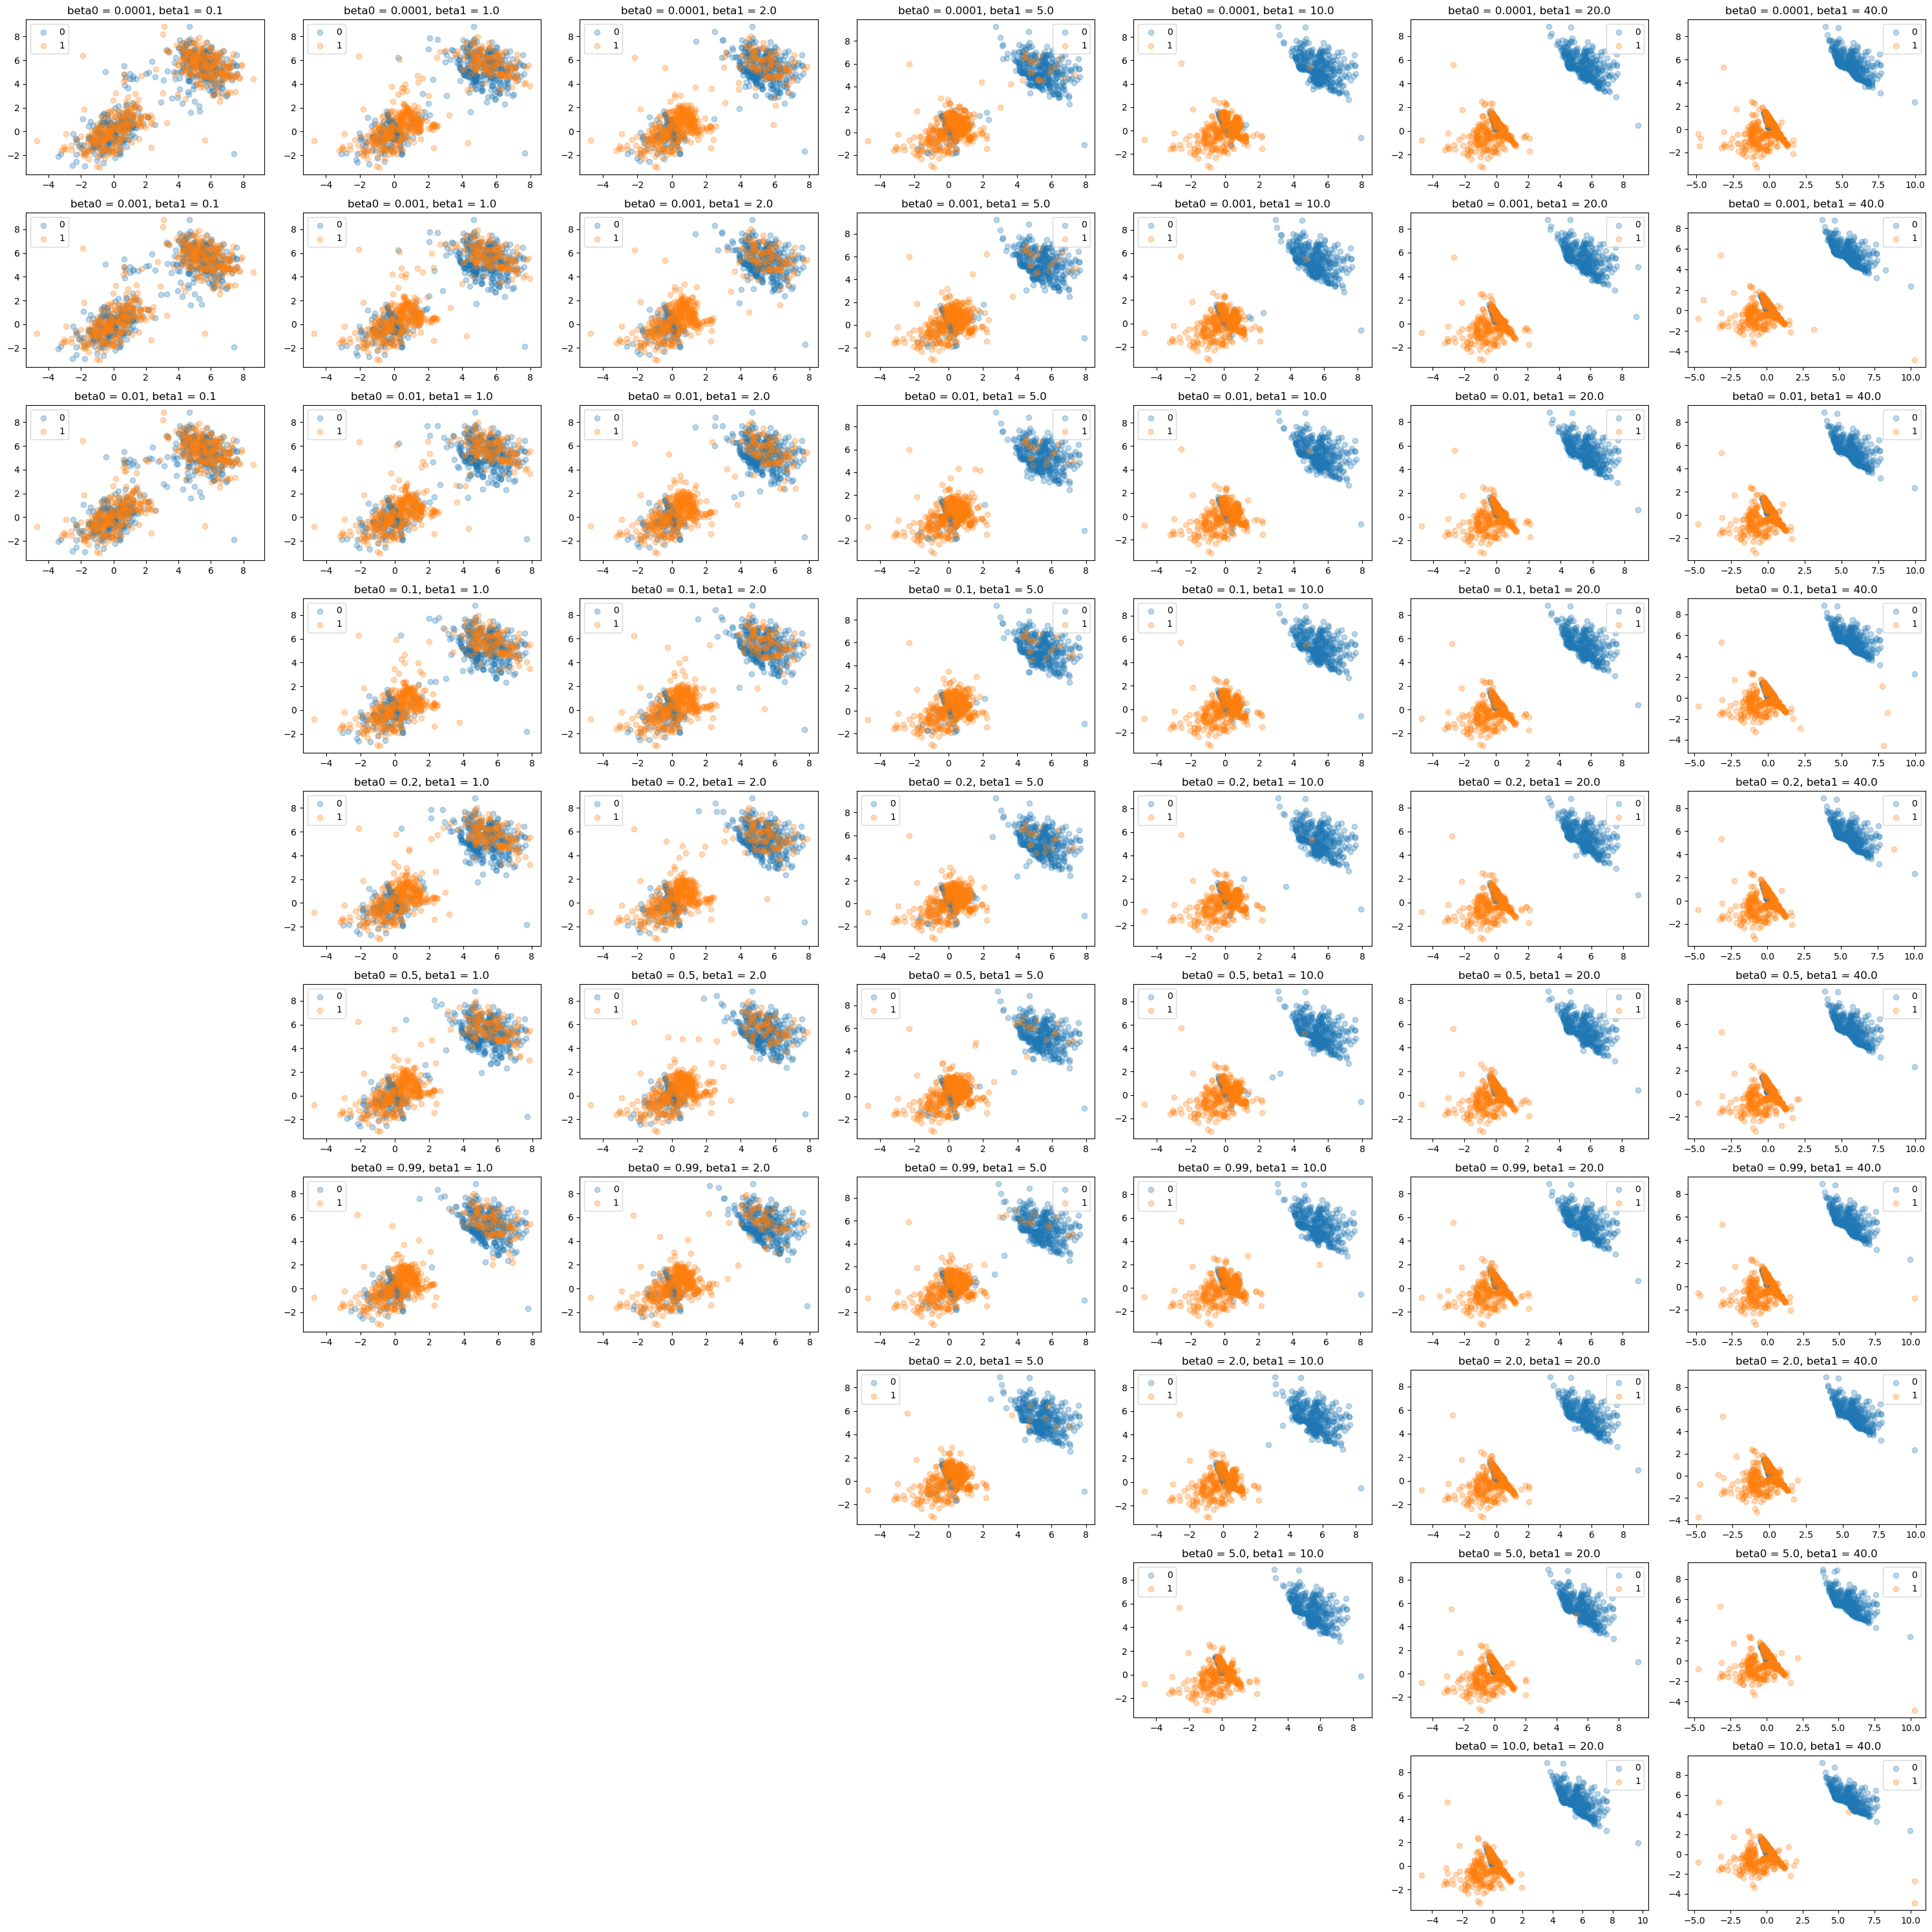

In [36]:
import pickle
import os
import matplotlib.pyplot as plt

# Define the number of rows and columns in the subplot matrix
num_rows = len(beta0_list)
num_cols = len(beta1_list)

# Create a new figure for the matrix of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Loop through each beta0 and beta1 value
for i, beta0 in enumerate(beta0_list):
    for j, beta1 in enumerate(beta1_list):
        for T in [1.]:
            path = f'{cache_dir}ode_gaussian_nsamp_{nsamp}_beta_0_{beta0}_beta_1_{beta1}_rtol_{rtol}_atol_{atol}_{method}_T_{T}_temp_gs.pkl'
            if not os.path.exists(path):
                path = f'{cache_dir}ode_gaussian_nsamp_{nsamp}_beta_0_{beta0}_beta_1_{int(beta1)}_rtol_{rtol}_atol_{atol}_{method}_T_{T}_temp_gs.pkl'
            try:
                with open(path, 'rb') as f:
                    data = pickle.load(f)
                    f.close()
                # Plot the data in the corresponding subplot
                
                axs[i, j].scatter(data[nsamp:,0], data[nsamp:,1], label=0, alpha=0.3)
                axs[i, j].scatter(data[:nsamp,0], data[:nsamp,1], label=1, alpha=0.3)
                axs[i, j].set_title(f'beta0 = {beta0}, beta1 = {beta1}')
                axs[i, j].legend()
            except FileNotFoundError:
                # If the file is not found, leave the subplot empty
                axs[i, j].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


As $\beta_1$ increases, the two classes are more separated. As $\beta_0$ decreases, each class becomes more Gaussian. 

The conditional samples are more sensitive to beta1 than beta0.

In [35]:
import numpy as np
def alpha_bar(beta0, beta1, T, t):
    beta_t = np.linspace(start = beta0, stop = beta1, endpoint=True, num = T)
    alpha_t = 1. - beta_t
    alpha_bar_t = alpha_t[1:(t+1)].sum()
    return alpha_bar_t
beta0,beta1,T,t = 0.001, 0.2, 1000, 1000
beta_t = np.linspace(start = beta0, stop = beta1, endpoint=True, num = T)

def perturbation_kernel(beta0, beta1, t):
    T = 1.
    beta_t = (beta1 - beta0) * t + beta0
    mean = np.exp(-t**2*(beta1-beta0)/4. - t*beta0/2.)
    var = 1.-np.exp(-0.5*t**2*(beta1-beta0) - t*beta0)
    return mean,var

perturbation_kernel(0.001, 10, 1)

(0.08206447993918525, 0.9932654211323111)